# 1. SUNSPOT DATA

In [6]:
# 1. Import the library 
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

In [7]:
#2. Read time series data
data=pd.read_csv('sunspot.csv',names=['value'],header=0)
print(data.head())

      value
1700    5.0
1701   11.0
1702   16.0
1703   23.0
1704   36.0


Text(0.5, 1.0, 'Sunspot series (1700 –1987)')

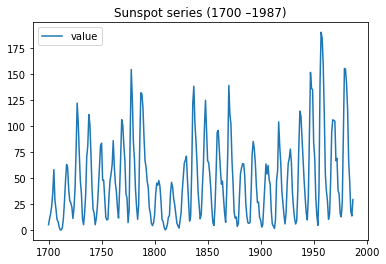

In [8]:
#3. Plot Time Series Data
data.plot()
plt.title("Sunspot series (1700 –1987)")


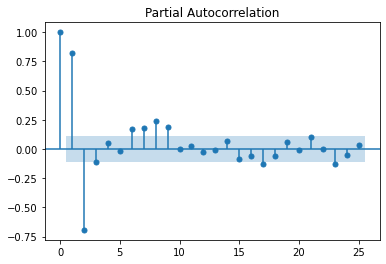

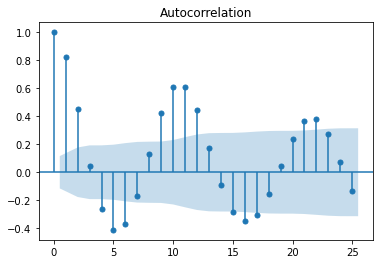

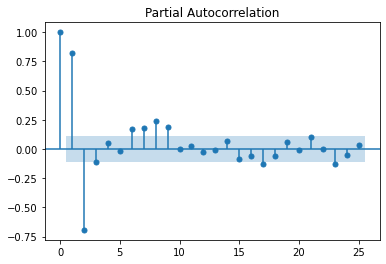

In [9]:
#4. Plot ACF and PACF
plot_acf(data)
plot_pacf(data)

In [13]:
#5. Augmented Dickey Fuller test (To test stationarity of the data)
result = adfuller(data,autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -2.6507166778653293
p-value: 0.08296151335561247
Critial Values:
   1%, -3.4540076534999957
Critial Values:
   5%, -2.8719557347997178
Critial Values:
   10%, -2.5723200648758366


#### The p-value =0.082 >0.05, fail to reject null hypothesis. The data is nonstationary

In [26]:
#First differencing
diff1=data.value.diff()
result = adfuller(diff1.dropna(),autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


ADF Statistic: -13.790620194748369
p-value: 8.940565744967533e-26
Critial Values:
   1%, -3.4540076534999957
Critial Values:
   5%, -2.8719557347997178
Critial Values:
   10%, -2.5723200648758366


#### The p-value =8.941 >0.05, fail to reject null hypothesis. The data is nonstationary

In [27]:
#second differencing
diff2=diff1.diff()
result = adfuller(diff2.dropna(),autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -10.480223986182425
p-value: 1.219147853603398e-18
Critial Values:
   1%, -3.4548039258751206
Critial Values:
   5%, -2.872304928618605
Critial Values:
   10%, -2.5725063100137175


#### The p-value =1.219 >0.05, fail to reject null hypothesis. The data is nonstationary

In [28]:
#third differencing
diff3=diff2.diff()
result = adfuller(diff3.dropna(),autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -12.374321551685613
p-value: 5.1965498511597376e-23
Critial Values:
   1%, -3.454988209954765
Critial Values:
   5%, -2.8723857312734613
Critial Values:
   10%, -2.572549407997327


#### The p-value =5.1965 >0.05, fail to reject null hypothesis. The data is nonstationary

In [15]:
#6. Data transformation 
#(Sqrt transformation)
y =np.sqrt(data)
result = adfuller(y,autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


ADF Statistic: -2.5931814521547163
p-value: 0.09441472760463981
Critial Values:
   1%, -3.4540076534999957
Critial Values:
   5%, -2.8719557347997178
Critial Values:
   10%, -2.5723200648758366


#### The p-value =0.0944 >0.05, fail to reject null hypothesis. The data is nonstationary

In [28]:
#7. Auto ARIMA (Parameter estimation by using MLE (to find lowest AIC))
model = pm.auto_arima(data.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=9, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2537.717, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3200.321, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2628.221, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2890.083, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2505.871, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2506.978, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2435.452, Time=0.31 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2503.218, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2423.801, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2484.768, Time=0.10 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=2422.758, Time=0.41 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2480.086, Time=0.12 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=2407.712, Time=0.41 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=2457.792, Time=0.17 sec
 ARIMA(7,0,1)(0,0,0)[0]          

#### The computer suggested ARIMA(9,0,0) will the most fit model with the lowest AIC values.

In [7]:
#7. Split into training and test data
X = data.values
size = int(221)
train_ARIMA, test_ARIMA = X[0:size], X[size:len(X)]

In [10]:
#8. Build the model with training set
model_ARIMA = ARIMA(train_ARIMA, order=(9,0,0))
model_fit_ARIMA = model_ARIMA.fit(disp=0)
print(model_fit_ARIMA.summary())
ljung=sm.stats.acorr_ljungbox(model_fit_ARIMA.resid, lags=[10], return_df=True)
print(ljung)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  221
Model:                     ARMA(9, 0)   Log Likelihood                -899.756
Method:                       css-mle   S.D. of innovations             14.091
Date:                Tue, 16 Nov 2021   AIC                           1821.512
Time:                        14:33:00   BIC                           1858.892
Sample:                             0   HQIC                          1836.605
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3946      5.193      8.164      0.000      32.217      52.572
ar.L1.y        1.2061      0.067     18.094      0.000       1.075       1.337
ar.L2.y       -0.4492      0.105     -4.284      0.0

#### The Ljung Box Test showed that the model follow white noise process.Thus the fitted model is adequate.

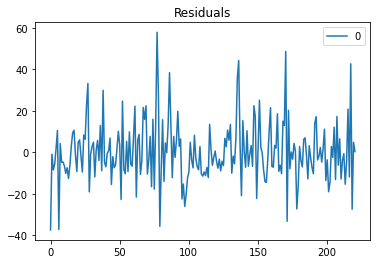

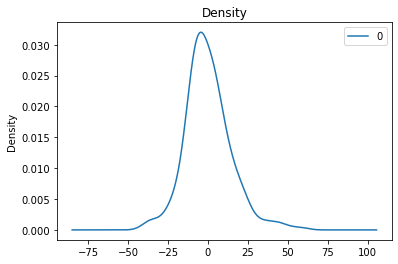

In [10]:
#9. Residuals diagnostics
residuals = pd.DataFrame(model_fit_ARIMA.resid)
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Density')
plt.show()

In [11]:
#10. Fit the model with train set then forecast one step 67 forecasting horizon
history = [x for x in train_ARIMA]
Predictions_ARIMA = []
for t in range(len(test_ARIMA)):
	model = ARIMA(history, order=(9,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	Predictions_ARIMA.append(yhat)
	obs = test_ARIMA[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=24.555158, expected=26.100000
predicted=12.949663, expected=14.200000
predicted=13.940176, expected=5.800000
predicted=10.271042, expected=16.700000
predicted=34.330751, expected=44.300000
predicted=67.457488, expected=63.900000
predicted=74.116301, expected=69.000000
predicted=66.830975, expected=77.800000
predicted=71.949660, expected=64.900000
predicted=49.699860, expected=35.700000
predicted=16.141384, expected=21.200000
predicted=14.034375, expected=11.100000
predicted=11.326163, expected=5.700000
predicted=13.179338, expected=8.700000
predicted=24.061285, expected=36.100000
predicted=56.973467, expected=79.700000
predicted=98.112948, expected=114.400000
predicted=114.816801, expected=109.600000
predicted=86.776931, expected=88.800000
predicted=60.361571, expected=67.800000
predicted=44.198449, expected=47.500000
predicted=26.829953, expected=30.600000
predicted=18.140605, expected=16.300000
predicted=15.322874, expected=9.600000
predicted=22.038581, expected=33.200000
p

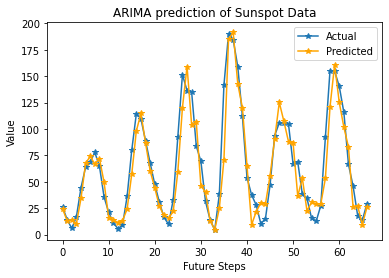

In [18]:
#11. Plot the forecasted and Actual Testing sets (86 observations)
plt.plot(test_ARIMA, label = 'Actual', marker = '*')
plt.plot(Predictions_ARIMA, color='orange', label = 'Predicted', marker = '*')
plt.title('ARIMA prediction of Sunspot Data')
plt.xlabel('Future Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [20]:
#12. Calculate the MSE, MAE and MAPE
error1 = mean_squared_error(test_ARIMA, Predictions_ARIMA) #MSE
print("Test MSE" ,error1)

MAE1= mean_absolute_error(test_ARIMA,Predictions_ARIMA)
print("MAE: ",MAE1)

Test MSE 308.90456039753127
MAPE:  31.512131415340356
MAE:  13.04671864518939
